## Large scale precipitation

Looking at the percipitaton globally at time=0 and the mean over the whole dataset.

In [25]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import imageio

In [2]:
ds=xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_tpr.nc')
da=xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_tpr.nc')

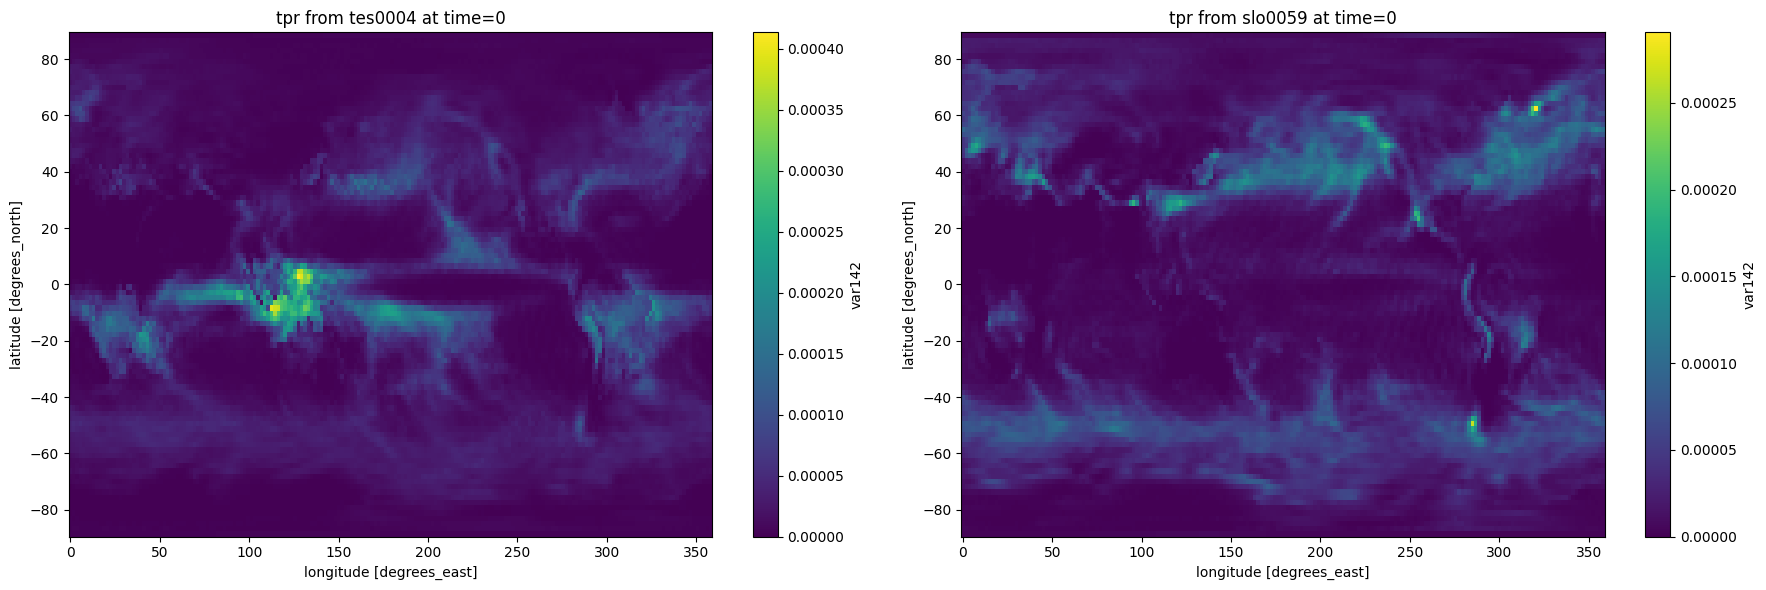

In [3]:
var_tes = ds['var142']
var_slo = da['var142']

# Select a single time step
single_time = var_tes.isel(time=0)
st=var_slo.isel(time=0)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 6)) 

# Plot each time slice
single_time.plot(ax=ax[0], cmap='viridis')
ax[0].set_title("tpr from tes0004 at time=0")

st.plot(ax=ax[1], cmap='viridis')
ax[1].set_title("tpr from slo0059 at time=0")

plt.tight_layout()
plt.show()

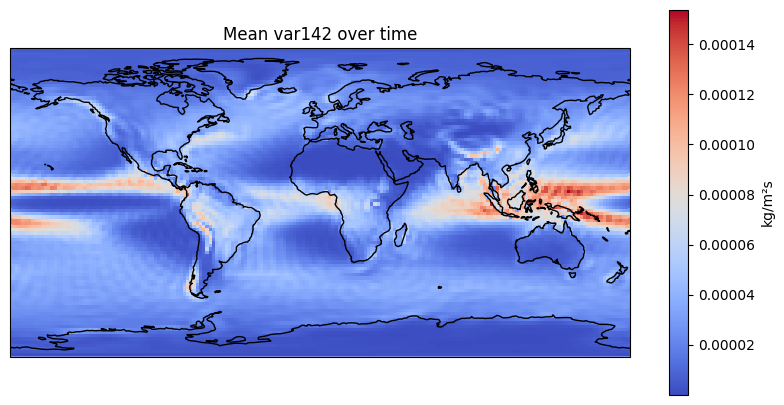

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds['var142'].mean(dim='time')

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'kg/m²s'})
ax.coastlines()
ax.set_title('Mean var142 over time')
plt.show()

## Looking at the sea ice cover

In [5]:
ds_ice_59 = xr.open_dataset('/nird/datalake/NS1004K/elihho/slo0059_echam6_BOT_mm_0_1850_var97.nc')
ds_ice_04 = xr.open_dataset('/nird/datalake/NS1004K/elihho/tes0004_echam6_BOT_mm_0_1850_var97.nc')
ds_ice_59

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 22200, lon: 192, lat: 96)
Coordinates:
  * time     (time) float64 178kB 7.001e+07 7.001e+07 ... 8.85e+07 8.85e+07
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 768B 88.57 86.72 84.86 83.0 ... -84.86 -86.72 -88.57
Data variables:
    var97    (time, lat, lon) float32 2GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 14 16:20:25 2020: cdo cat slo0059__echam6_BOT_mm_70...
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

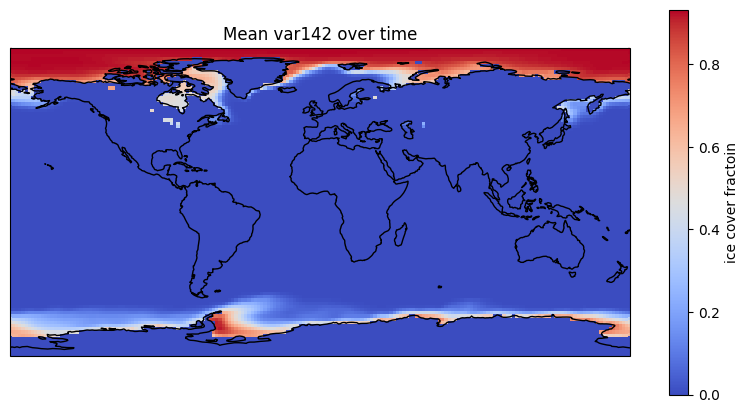

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Select a time slice
data = ds_ice_59['var97'].mean(dim='time')

# Plot
data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'ice cover fractoin'})
ax.coastlines()
ax.set_title('Mean var142 over time')
plt.show()

In [7]:
last_date_num = 88501231
first_date_num = 70010131

total_days_num = last_date_num - first_date_num  # ~ 18491100

total_years = 1850  # from 0 to 1850

# Calculate how many "numeric units" per year
units_per_year = total_days_num / total_years  # ~ 9995 units/year

def year_to_numeric(year):
    return first_date_num + year * units_per_year

### Sea ice extension after Samalas 1257

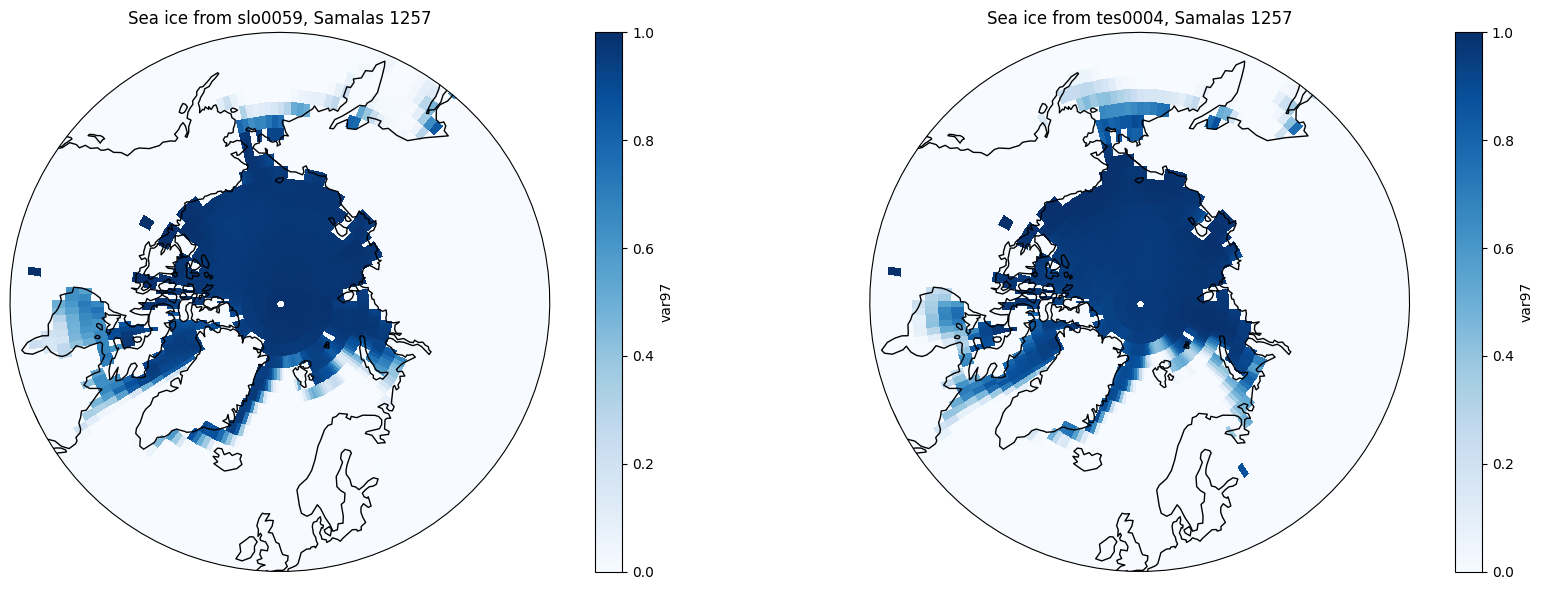

In [8]:
Samalas=year_to_numeric(1257)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

# Helper function to set latitudinal limits
# from https://nordicesmhub.github.io/NEGI-Abisko-2019/training/example_NorthPolarStereo_projection.html
def polarCentral_set_latlim(lat_lims, ax):
    # Set extent in geographic coordinates
    ax.set_extent([-180, 180, lat_lims[0], lat_lims[1]], crs=ccrs.PlateCarree())

    # Make circular boundary (center of axes)
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, Samalas 1257")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, Samalas 1257")
ax2.coastlines()

plt.tight_layout()
plt.show()

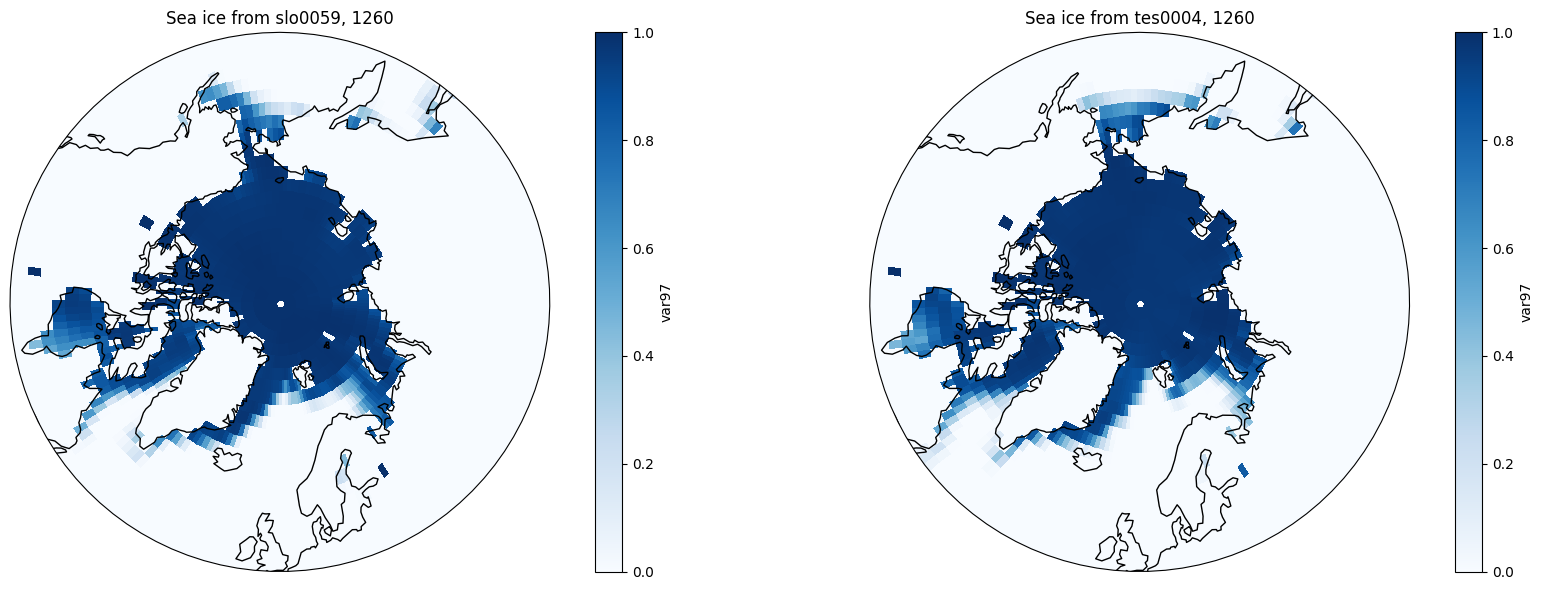

In [9]:
Samalas=year_to_numeric(1260)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1260")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1260")
ax2.coastlines()

plt.tight_layout()
plt.show()

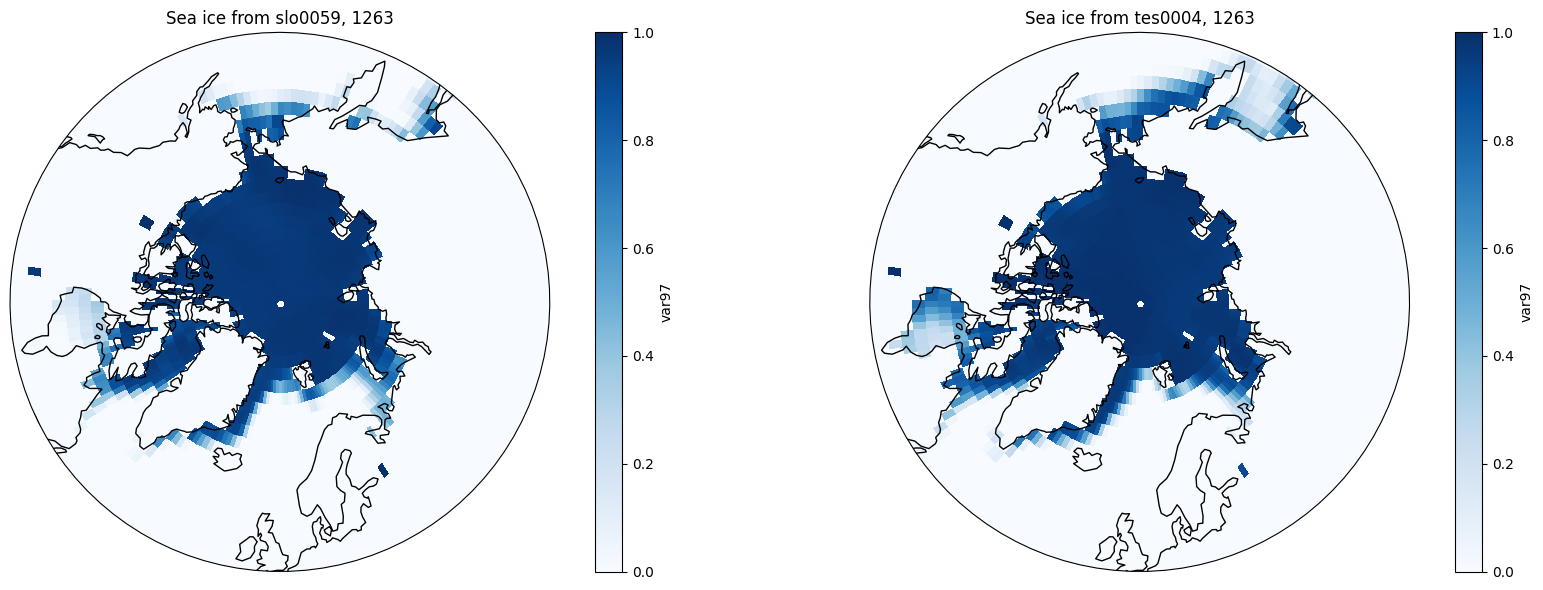

In [10]:
Samalas=year_to_numeric(1263)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1263")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1263")
ax2.coastlines()

plt.tight_layout()
plt.show()

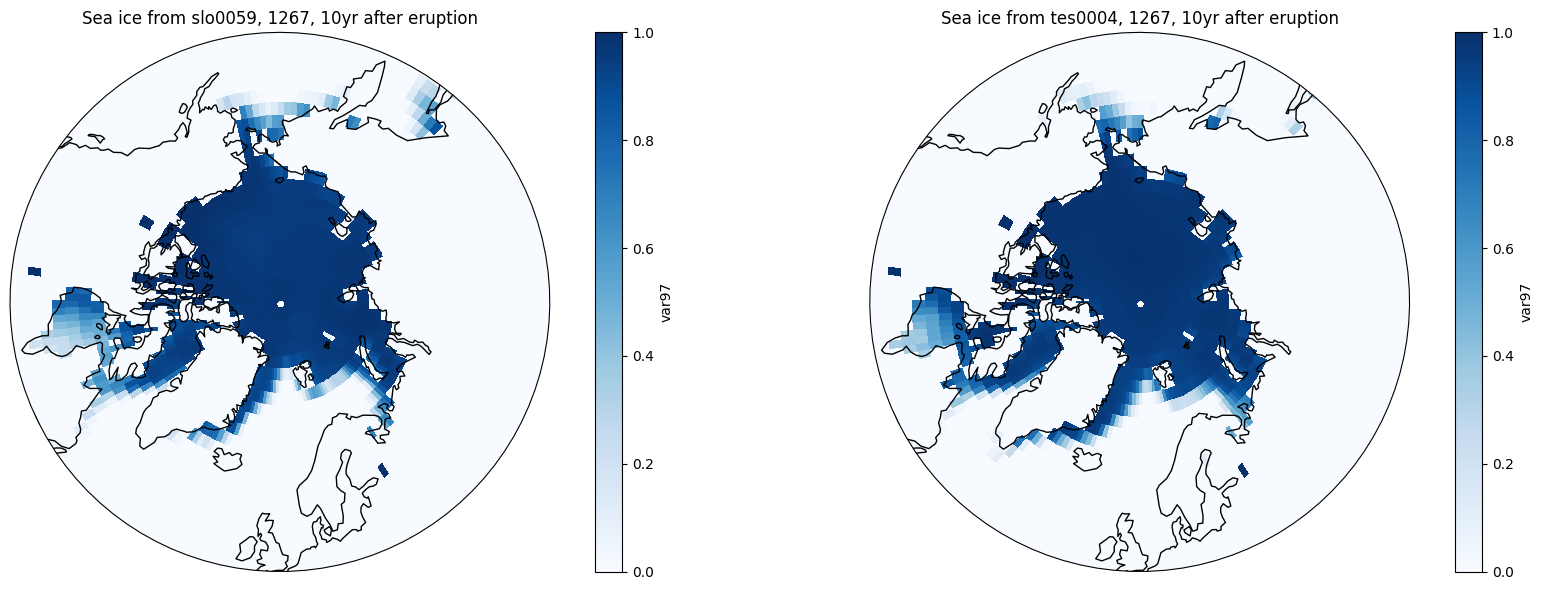

In [11]:
Samalas=year_to_numeric(1267)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1267, 10yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1267, 10yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

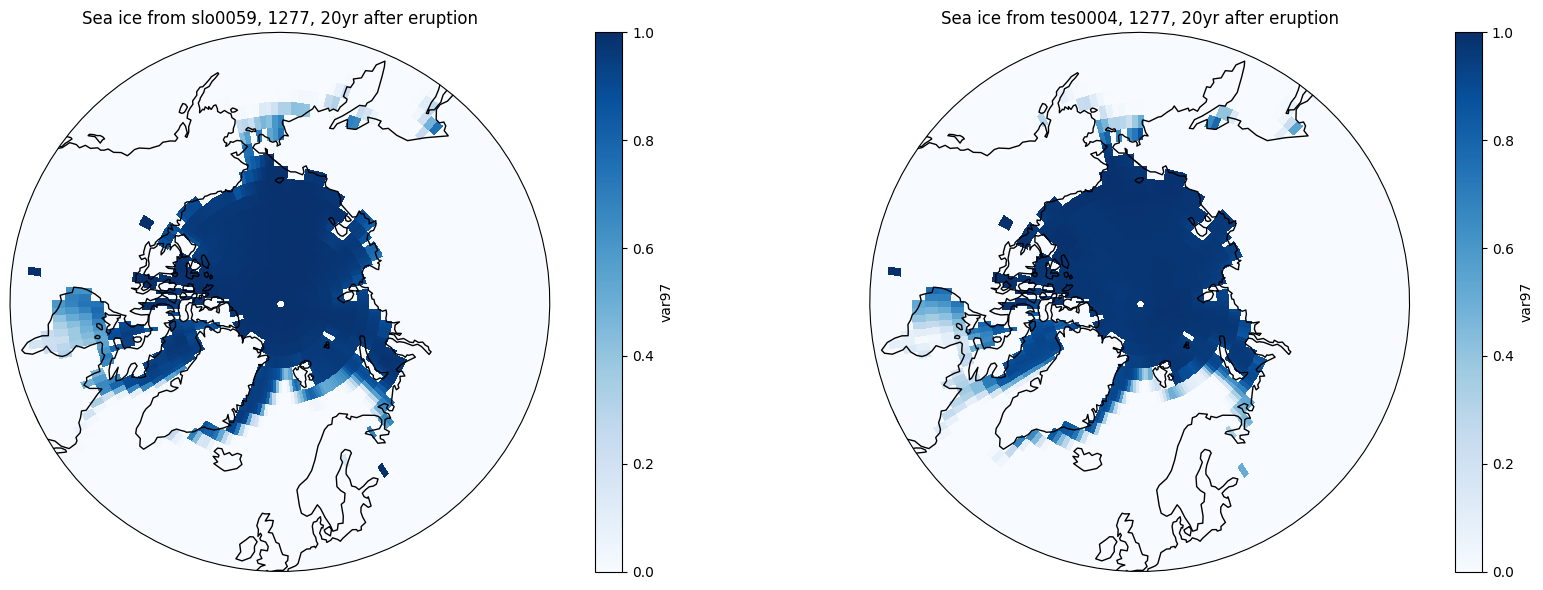

In [12]:
Samalas=year_to_numeric(1277)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Samalas, method='nearest')
st_04=var04.sel(time=Samalas, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1277, 20yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1277, 20yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

### Sea ice extension after Kuwae (unidentified) 1458

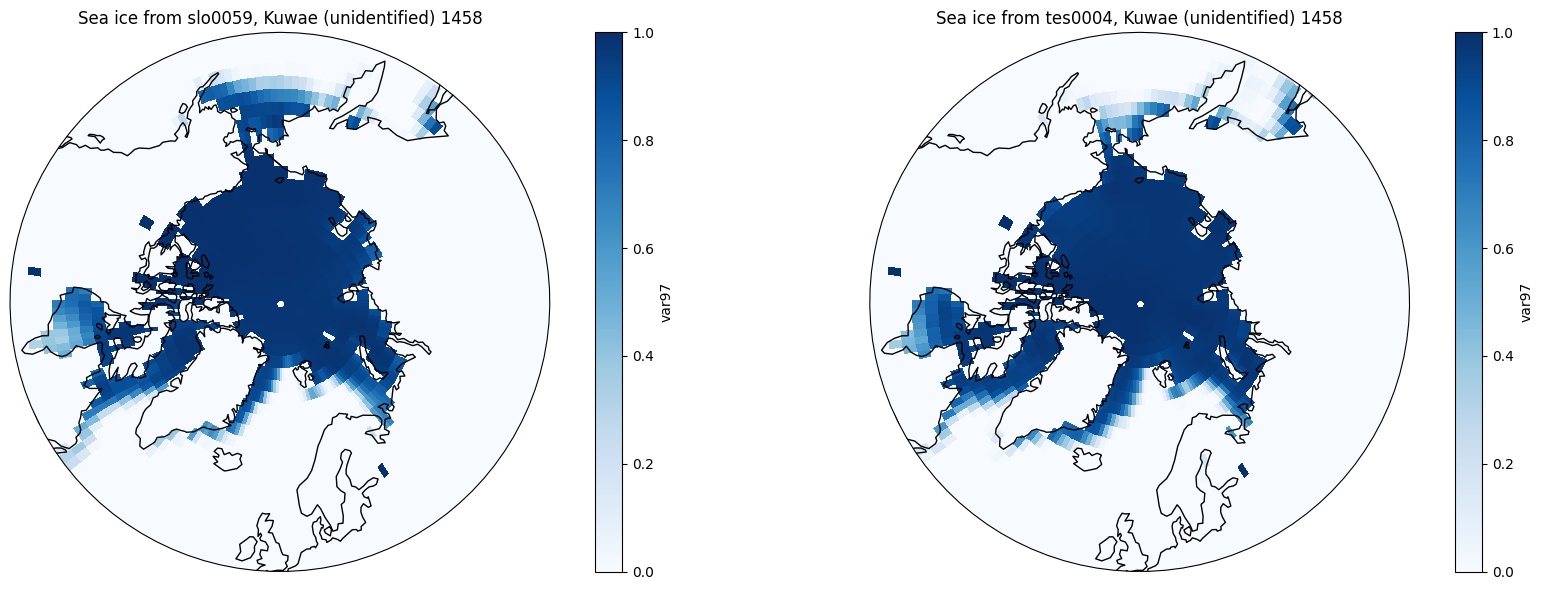

In [13]:
Kuwae=year_to_numeric(1458)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Kuwae, method='nearest')
st_04=var04.sel(time=Kuwae, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, Kuwae (unidentified) 1458")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, Kuwae (unidentified) 1458")
ax2.coastlines()

plt.tight_layout()
plt.show()

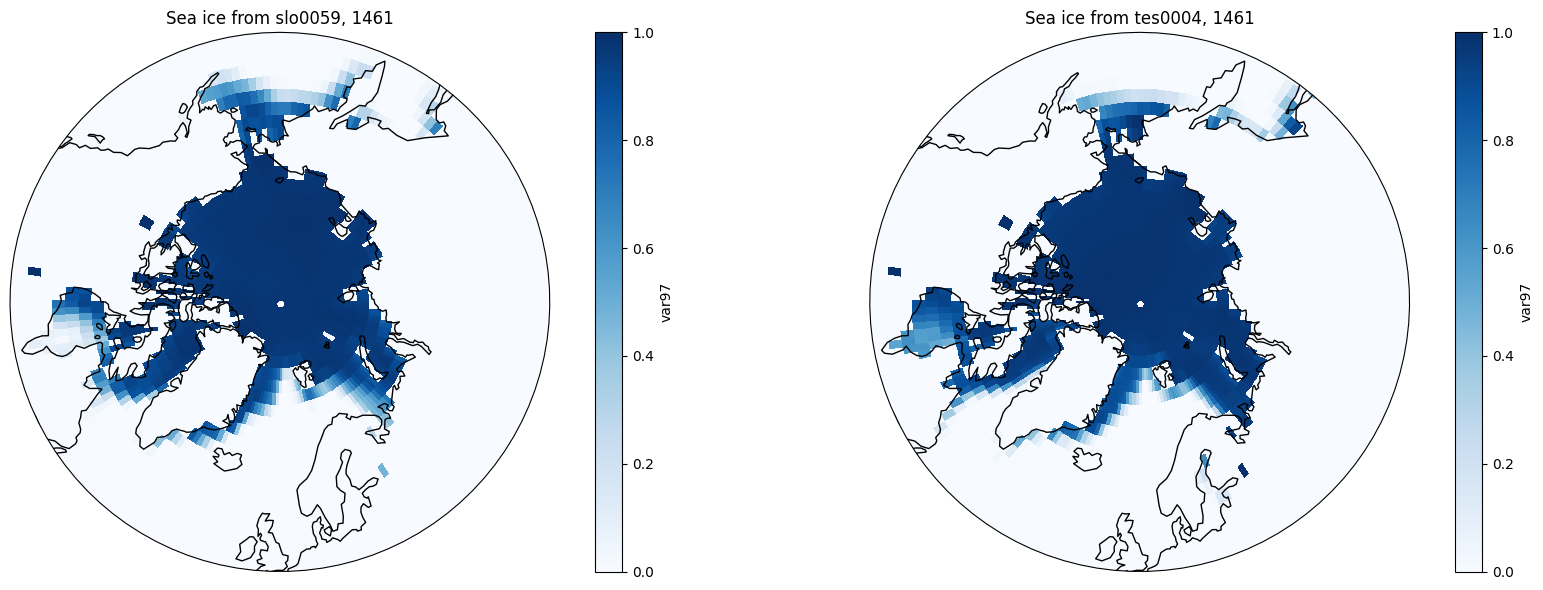

In [14]:
Kuwae=year_to_numeric(1461)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Kuwae, method='nearest')
st_04=var04.sel(time=Kuwae, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1461")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1461")
ax2.coastlines()

plt.tight_layout()
plt.show()

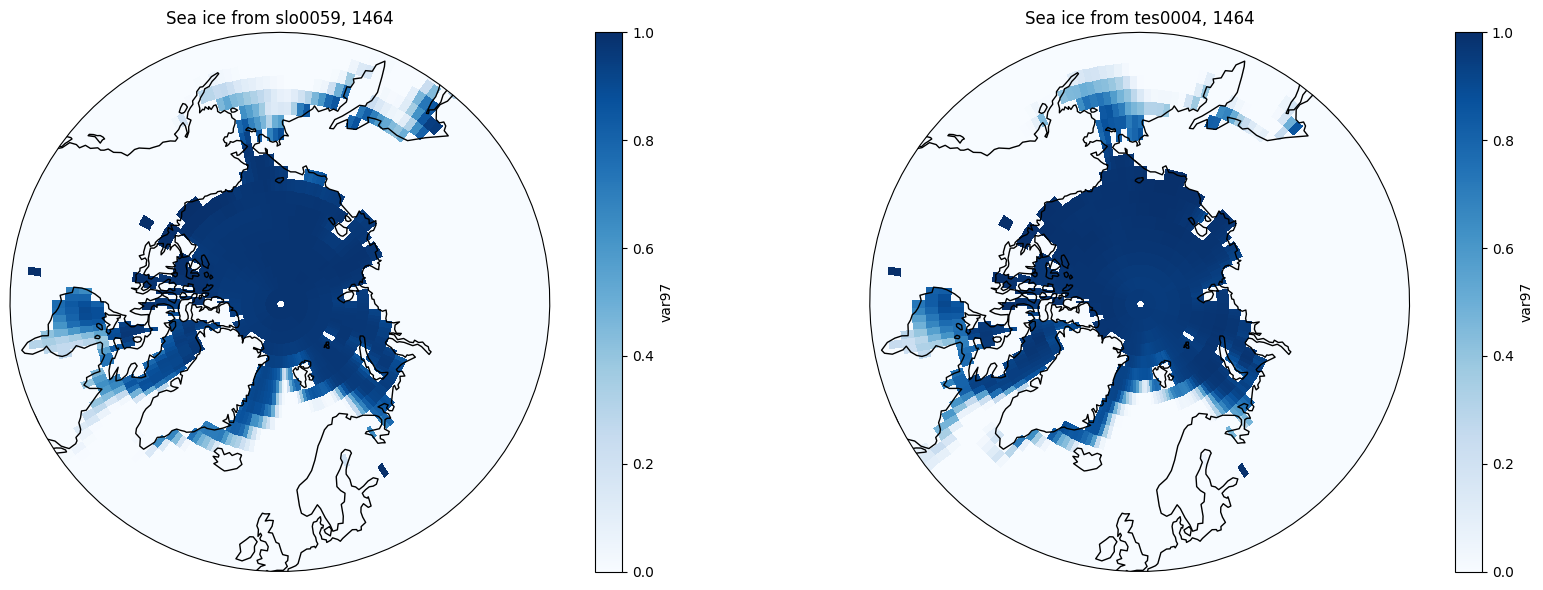

In [15]:
Kuwae=year_to_numeric(1464)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Kuwae, method='nearest')
st_04=var04.sel(time=Kuwae, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1464")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1464")
ax2.coastlines()

plt.tight_layout()
plt.show()

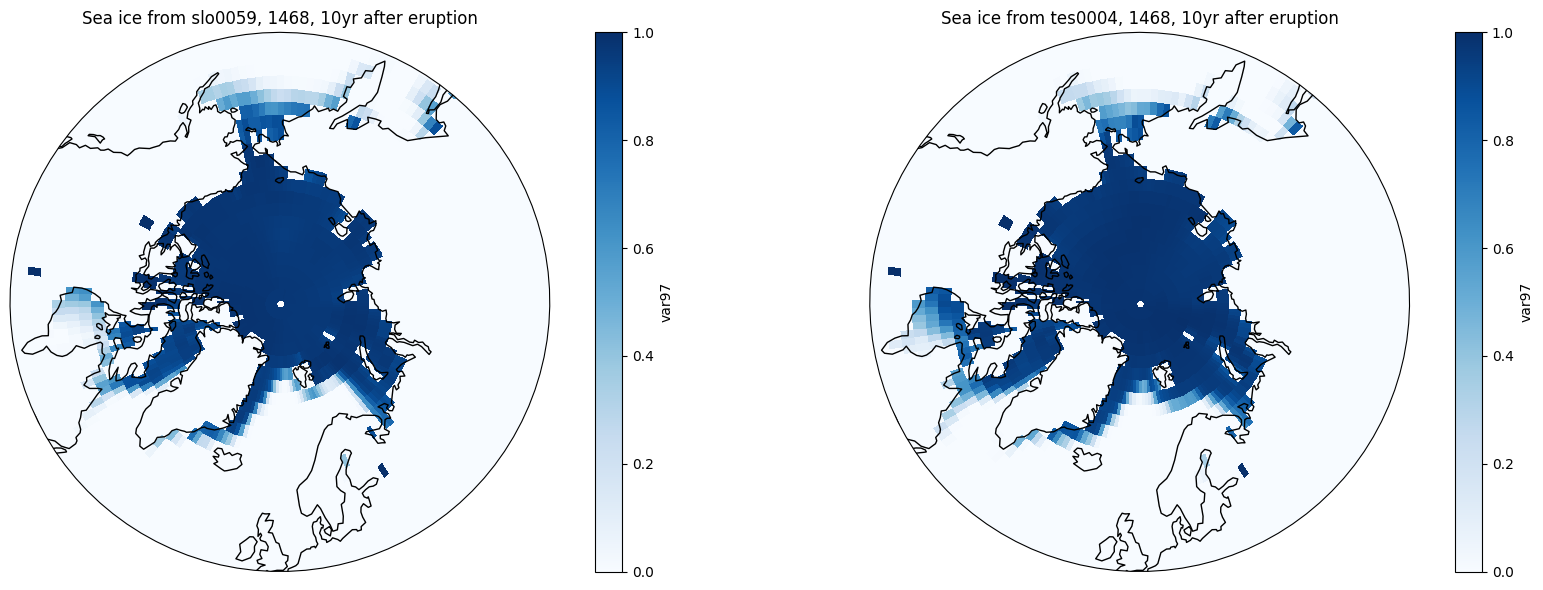

In [16]:
Kuwae=year_to_numeric(1468)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Kuwae, method='nearest')
st_04=var04.sel(time=Kuwae, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1468, 10yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1468, 10yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

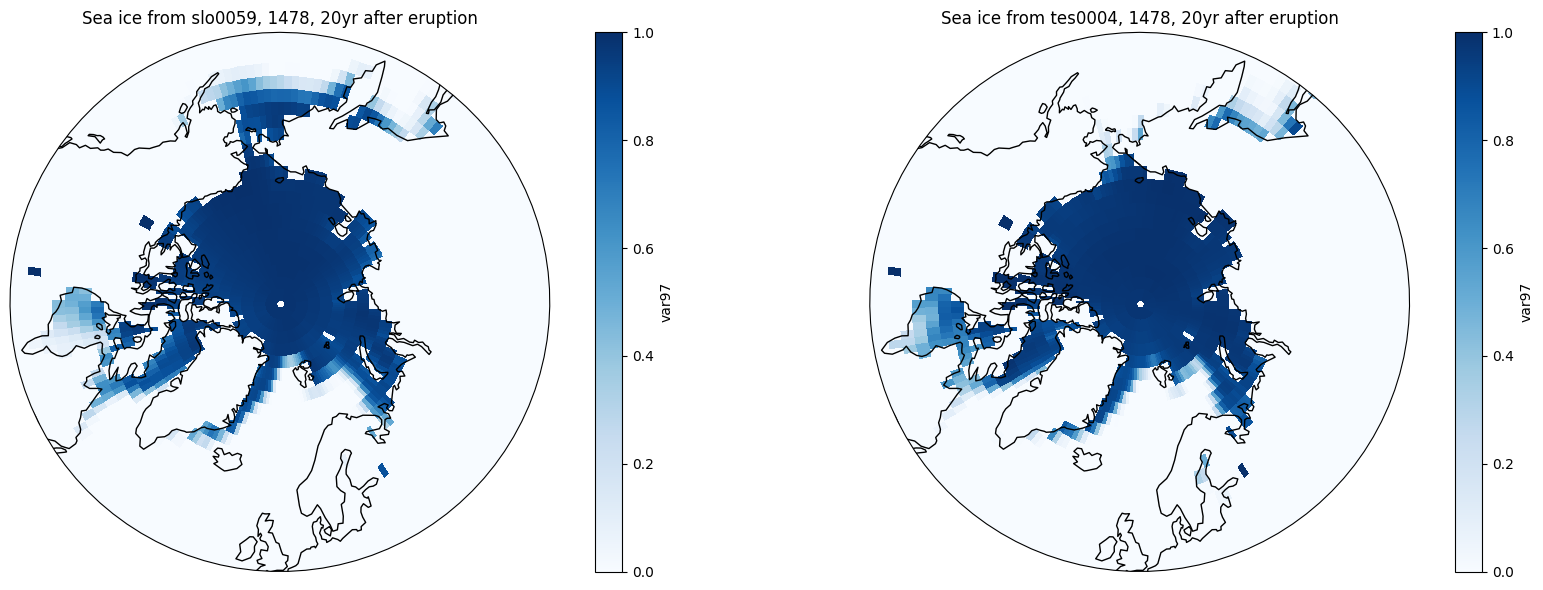

In [17]:
Kuwae=year_to_numeric(1478)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Kuwae, method='nearest')
st_04=var04.sel(time=Kuwae, method='nearest')


# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1478, 20yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1478, 20yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

### Sea ice extension after Tambora 1815

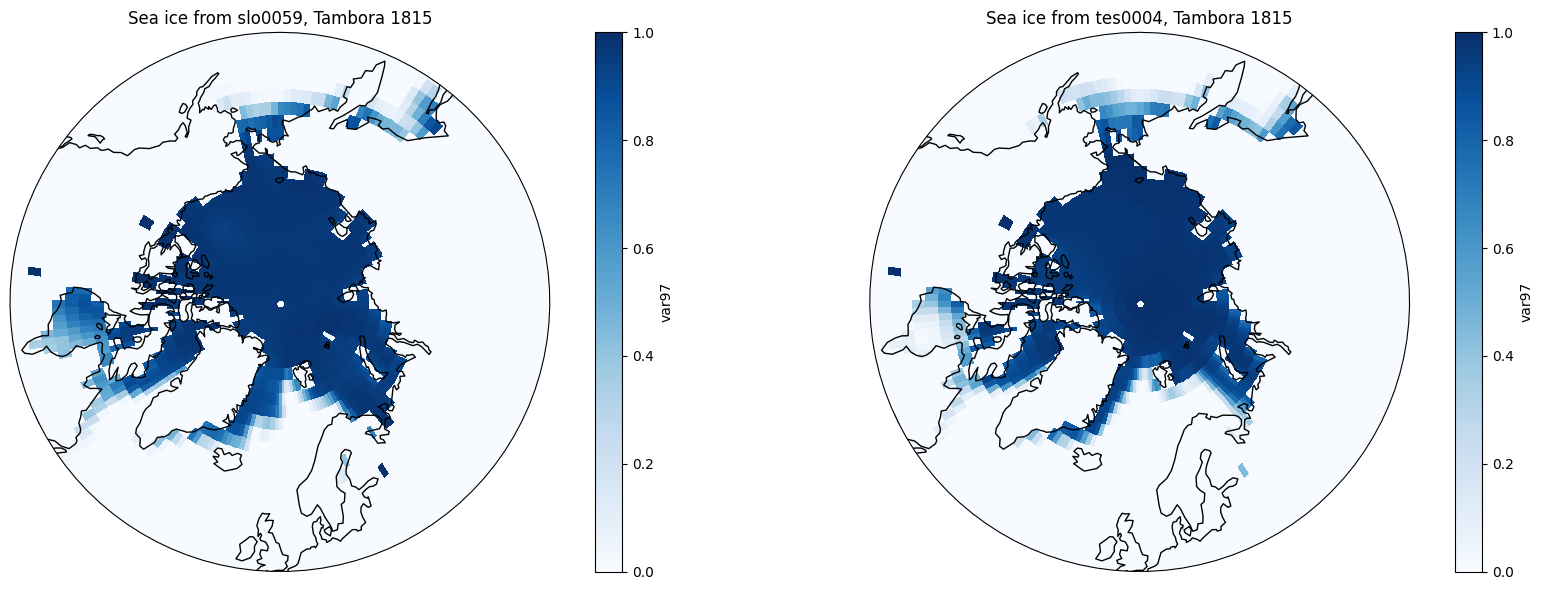

In [18]:
Tambora=year_to_numeric(1815)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Tambora, method='nearest')
st_04=var04.sel(time=Tambora, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, Tambora 1815")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, Tambora 1815")
ax2.coastlines()

plt.tight_layout()
plt.show()

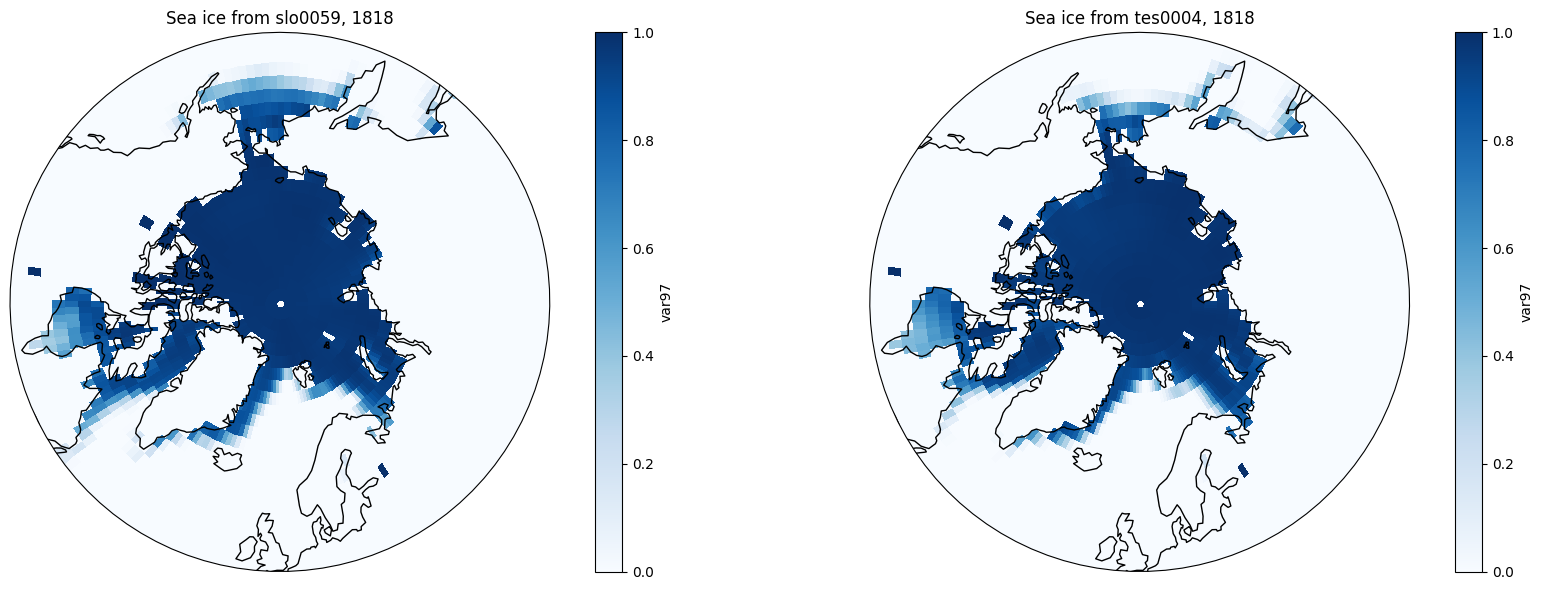

In [19]:
Tambora=year_to_numeric(1818)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Tambora, method='nearest')
st_04=var04.sel(time=Tambora, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1818")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1818")
ax2.coastlines()

plt.tight_layout()
plt.show()

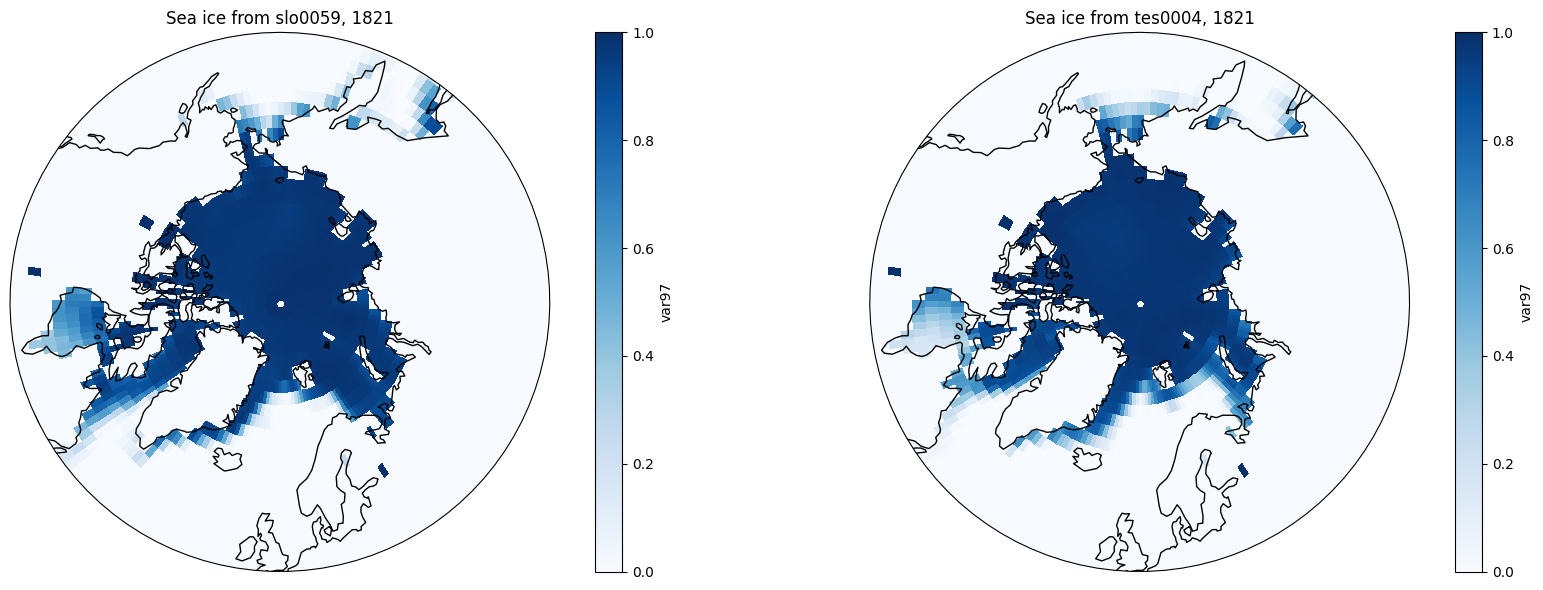

In [20]:
Tambora=year_to_numeric(1821)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Tambora, method='nearest')
st_04=var04.sel(time=Tambora, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1821")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1821")
ax2.coastlines()

plt.tight_layout()
plt.show()

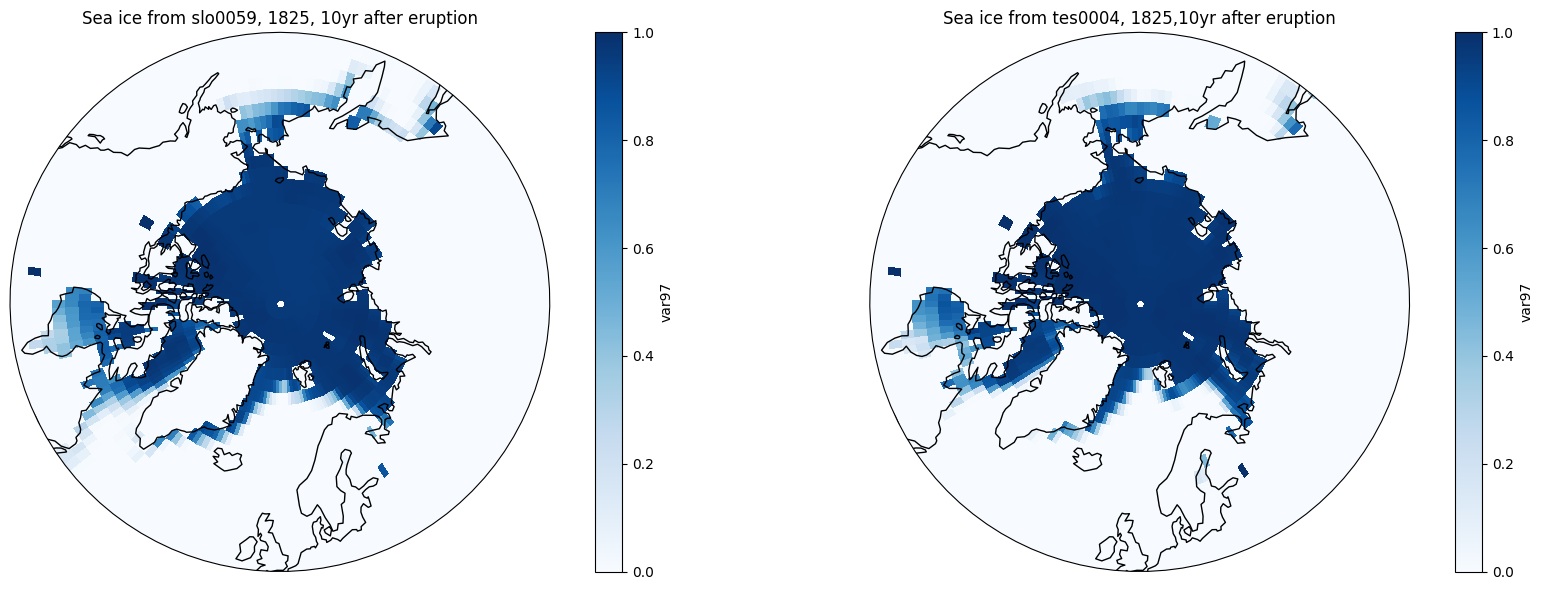

In [21]:
Tambora=year_to_numeric(1825)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Tambora, method='nearest')
st_04=var04.sel(time=Tambora, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1825, 10yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1825,10yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

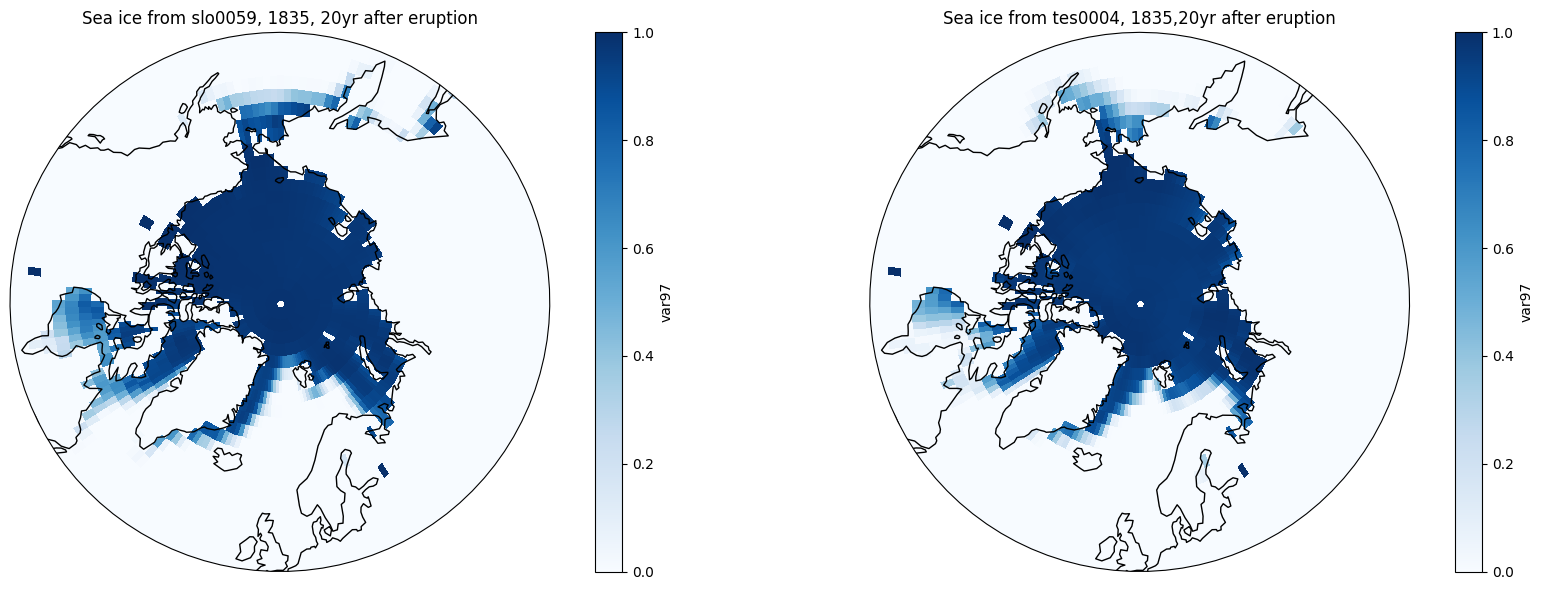

In [22]:
Tambora=year_to_numeric(1835)
var59 = ds_ice_59['var97']
var04 = ds_ice_04['var97']

st_59 = var59.sel(time=Tambora, method='nearest')
st_04=var04.sel(time=Tambora, method='nearest')

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(18, 6),
    subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
)

# Apply settings and plot on ax1
polarCentral_set_latlim((50, 90), ax1)
st_59.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues')
ax1.set_title("Sea ice from slo0059, 1835, 20yr after eruption")
ax1.coastlines()

# Apply settings and plot on ax2
polarCentral_set_latlim((50, 90), ax2)
st_04.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues')
ax2.set_title("Sea ice from tes0004, 1835,20yr after eruption")
ax2.coastlines()

plt.tight_layout()
plt.show()

In [26]:
# Define years
years = range(1256, 1278)  

# Create frame directory
os.makedirs("frames", exist_ok=True)
filenames = []

# Gather all data to compute global min/max (optional)
seaice = []
for year in years:
    ice = var59.sel(time=year_to_numeric(year), method='nearest')
    seaice.append(ice)

all_ice = xr.concat(seaice, dim='time')
vmin = float(all_ice.min())
vmax = float(all_ice.max())

# Loop and generate plots
for year in years:
    ice_snapshot = var59.sel(time=year_to_numeric(year), method='nearest')
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8),
        subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
    )

    # Set extent for polar view (lon_min, lon_max, lat_min, lat_max) in PlateCarree
    ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Optional gridlines
    gl = ax.gridlines(draw_labels=False, x_inline=False, y_inline=False)
    
    # Plot
    ice_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='Blues',
        vmin=vmin_sym,
        vmax=vmax_sym,
        cbar_kwargs={'label': 'Sea Ice Concentration'}
    )
    
    ax.set_title(f"Sea Ice Extension ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF
with imageio.get_writer('sea_ice_1256_1278.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'sea_ice_1256_1278.gif'")

/tmp/ipykernel_3719275/4123199449.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'sea_ice_1256_1278.gif'


In [27]:
# Define years
years = range(1457, 1479)  

# Create frame directory
os.makedirs("frames", exist_ok=True)
filenames = []

# Gather all data to compute global min/max (optional)
seaice = []
for year in years:
    ice = var59.sel(time=year_to_numeric(year), method='nearest')
    seaice.append(ice)

all_ice = xr.concat(seaice, dim='time')
vmin = float(all_ice.min())
vmax = float(all_ice.max())

# Loop and generate plots
for year in years:
    ice_snapshot = var59.sel(time=year_to_numeric(year), method='nearest')
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8),
        subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
    )

    # Set extent for polar view (lon_min, lon_max, lat_min, lat_max) in PlateCarree
    ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Optional gridlines
    gl = ax.gridlines(draw_labels=False, x_inline=False, y_inline=False)
    
    # Plot
    ice_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='Blues',
        vmin=vmin_sym,
        vmax=vmax_sym,
        cbar_kwargs={'label': 'Sea Ice Concentration'}
    )
    
    ax.set_title(f"Sea Ice Extension ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF
with imageio.get_writer('sea_ice_1457_1479.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'sea_ice_1457_1479.gif'")


/tmp/ipykernel_3719275/2833085443.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'sea_ice_1457_1479.gif'


In [28]:
# Define years
years = range(1814, 1836)  

# Create frame directory
os.makedirs("frames", exist_ok=True)
filenames = []

# Gather all data to compute global min/max (optional)
seaice = []
for year in years:
    ice = var59.sel(time=year_to_numeric(year), method='nearest')
    seaice.append(ice)

all_ice = xr.concat(seaice, dim='time')
vmin = float(all_ice.min())
vmax = float(all_ice.max())

# Loop and generate plots
for year in years:
    ice_snapshot = var59.sel(time=year_to_numeric(year), method='nearest')
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8),
        subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=0))
    )

    # Set extent for polar view (lon_min, lon_max, lat_min, lat_max) in PlateCarree
    ax.set_extent([-180, 180, 50, 90], crs=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.coastlines(resolution='10m', color='black', linewidth=1)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    
    # Optional gridlines
    gl = ax.gridlines(draw_labels=False, x_inline=False, y_inline=False)
    
    # Plot
    ice_snapshot.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='Blues',
        vmin=vmin_sym,
        vmax=vmax_sym,
        cbar_kwargs={'label': 'Sea Ice Concentration'}
    )
    
    ax.set_title(f"Sea Ice Extension ({year})")
    
    filename = f"frames/frame_{year}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    filenames.append(filename)
    plt.close(fig)

# Create GIF
with imageio.get_writer('sea_ice_1814_1835.gif', mode='I', duration=1.2) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up
for filename in filenames:
    os.remove(filename)
os.rmdir("frames")

print("✅ GIF saved as 'sea_ice_1814_1835.gif'")

/tmp/ipykernel_3719275/712201513.py:58: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF saved as 'sea_ice_1814_1835.gif'
